<a href="https://colab.research.google.com/github/03dipak/kaggle/blob/master/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/03dipak/kaggle/master/titanic/train_titanic.csv",sep=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.drop(columns=['Cabin'],inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
df_train.Age.fillna(df_train['Age'].mean(),inplace=True)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [0]:
df_train.Embarked.fillna(df_train['Embarked'].mode()[0],inplace=True)

In [22]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [24]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [29]:
df_train['genderclass'] = df_train.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,genderclass
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,male
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,male


In [30]:
df_train[df_train['Age'] < 15].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,genderclass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,child


In [0]:
df_train['familySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [0]:
df_train['accompany'] = df_train['SibSp'] + df_train['Parch']

In [34]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,genderclass,familySize,accompany
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S,male,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S,female,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S,female,4,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,male,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,male,1,0


In [0]:
corr = df_train.corr()

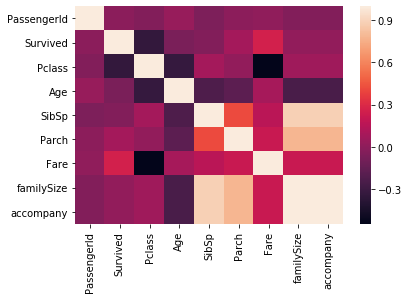

In [36]:
sns.heatmap(corr)

In [37]:
df_train.drop(columns=['Name','Ticket','Sex','SibSp','Parch', 'PassengerId'],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Age,Fare,Embarked,genderclass,familySize,accompany
0,0,3,22.0,7.2500,S,male,2,1
1,1,1,38.0,71.2833,C,female,2,1
2,1,3,26.0,7.9250,S,female,1,0
3,1,1,35.0,53.1000,S,female,2,1
4,0,3,35.0,8.0500,S,male,1,0


In [0]:
corr = df_train.corr()

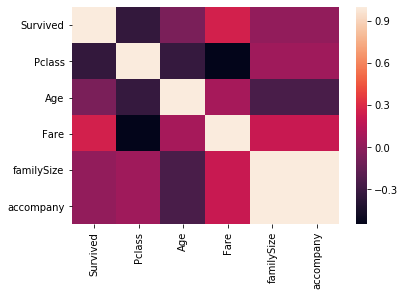

In [39]:
sns.heatmap(corr)